#

## Données bancaires et transactions des clients

### Source et structure de données :
- SRC :  https://www.kaggle.com/datasets/yogeshtekawade/banking-and-customer-transaction-data
    - HDFC Bank
    - customer_data.csv - données démographiques et profils client
    - transaction_data.csv - historique des transactions et investissements
    - bank_data.csv - performance financière des agences bancaires données synthétiques mais réalistes, avec du bruit et des valeurs manquantes pour simuler un environnement réel

## Chargement des données
## Nettoyage des données
    Pour garantir la fiabilité du modèle. L’encodage par one-hot permet de transformer les variables qualitatives en une forme compréhensible pour les algorithmes d’apprentissage supervisé.
## Séparation des variables
## Entraînement du modèle de l'Arbre de décision (Decision Tree)
Division des données en jeu d’entraînement et de test (70/30). On limite la profondeur de l’arbre à 3 pour éviter l’overfitting.
## Visualisation avec dtreeviz 
La bibliothèque dtreeviz offre une visualisation élégante et explicite de l’arbre de décision avec les splits, les proportions et les classes.  essentielle pour les parties prenantes non techniques. L’outil permet une interprétation intuitive du modèle en metttant en lumière les facteurs clés influençant la décision, ce qui facilite l’analyse métier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#Fusion des fichiers via les clés primaires Customer_ID et Branch_ID
#Cible : prédire le type d’investissement
#Entrainement d'un modèle de classification Random Forest et Arbre de décision
#Visualisation avec dtreeviz pour interpréter les décisions

In [2]:
import dtreeviz
from sklearn.tree import export_graphviz
import graphviz

In [3]:
directory_path = r'C:\Users\Admin\Desktop\BankingMLProject\data'
bank_filename = 'bank_data_cleaned.csv'
customer_filename = 'customer_data_cleaned.csv'
transactions_filename = 'transaction_data_cleaned.csv'

In [4]:
# Création du fichier fusioned_data.csv
# Chargement des fichiers CSV
clients = pd.read_csv(os.path.join(directory_path, customer_filename))
transactions = pd.read_csv(os.path.join(directory_path,transactions_filename))
banques = pd.read_csv(os.path.join(directory_path,bank_filename))

# Aperçu rapide
print(clients.shape, transactions.shape, banques.shape)

(10000, 7) (10000, 8) (1000, 6)


In [5]:
print(clients.columns, transactions.columns, banques.columns)

Index(['Customer_ID', 'Age', 'Customer_Type', 'City', 'Region', 'Bank_Name',
       'Branch_ID'],
      dtype='object') Index(['Transaction_ID', 'Customer_ID', 'Account_Type', 'Total_Balance',
       'Transaction_Amount', 'Investment_Amount', 'Investment_Type',
       'Transaction_Date'],
      dtype='object') Index(['Branch_ID', 'City', 'Region', 'Firm_Revenue', 'Expenses',
       'Profit_Margin'],
      dtype='object')


In [6]:
# Fusion client + transactions
df_merge1 = pd.merge(transactions, clients, on='Customer_ID', how='outer')

# Fusion avec données bancaires via la ville et la région
df_merge2 = pd.merge(df_merge1, banques, on=['Branch_ID','City', 'Region'], how='outer')

# Vérification
df_merge2.head()

#Création d'une copie
df_fusioned = df_merge2.copy()

La fusion progressive permet d’enrichir les données transactionnelles avec des informations clients et contextuelles (performance régionale).
Création une vue holistique du comportement client
#les transactions aux clients via Customer_ID, puis on enrichit avec les données bancaires en croisant City et Region.
 #Fusion des fichiers pour , en intégrant les facteurs individuels et contextuels (performance régionale)

In [7]:
# Affichage des 5 premières lignes pour inspection
df = df_fusioned.copy()
df.head()

,Transaction_ID,Customer_ID,Account_Type,Total_Balance,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date,Age,Customer_Type,City,Region,Bank_Name,Branch_ID,Firm_Revenue,Expenses,Profit_Margin
0,304833.0,204700.0,Current,57622.0,4676.0,11260.0,Fixed Deposit,2024-04-05,54.0,Individual,Kolhapur,East,HDFC Bank,1000,NaN,NaN,NaN
1,NaN,204624.0,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,Kolhapur,West,HDFC Bank,1000,NaN,NaN,NaN
2,NaN,201489.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,Employee,Nashik,South,HDFC Bank,1000,NaN,NaN,NaN
3,304051.0,205772.0,Current,26773.0,2924.0,9480.0,Recurring Deposit,2025-02-14,57.0,Individual,Nashik,West,HDFC Bank,1000,NaN,NaN,NaN
4,307451.0,205772.0,Current,31080.0,780.0,8956.0,Fixed Deposit,2022-11-07,57.0,Individual,Nashik,West,HDFC Bank,1000,NaN,NaN,NaN


In [8]:
print(df.columns)

Index(['Transaction_ID', 'Customer_ID', 'Account_Type', 'Total_Balance',
       'Transaction_Amount', 'Investment_Amount', 'Investment_Type',
       'Transaction_Date', 'Age', 'Customer_Type', 'City', 'Region',
       'Bank_Name', 'Branch_ID', 'Firm_Revenue', 'Expenses', 'Profit_Margin'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14336 entries, 0 to 14335
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      10000 non-null  float64
 1   Customer_ID         13665 non-null  float64
 2   Account_Type        10000 non-null  object 
 3   Total_Balance       10000 non-null  float64
 4   Transaction_Amount  10000 non-null  float64
 5   Investment_Amount   10000 non-null  float64
 6   Investment_Type     10000 non-null  object 
 7   Transaction_Date    10000 non-null  object 
 8   Age                 12982 non-null  float64
 9   Customer_Type       12982 non-null  object 
 10  City                13667 non-null  object 
 11  Region              14336 non-null  object 
 12  Bank_Name           13665 non-null  object 
 13  Branch_ID           14336 non-null  int64  
 14  Firm_Revenue        1155 non-null   float64
 15  Expenses            1222 non-null   float64
 16  Prof

In [10]:
df.describe()

,Transaction_ID,Customer_ID,Total_Balance,Transaction_Amount,Investment_Amount,Age,Branch_ID,Firm_Revenue,Expenses,Profit_Margin
count,10000.00000,13665.000000,10000.000000,10000.000000,10000.000000,12982.000000,14336.000000,1155.000000,1222.000000,1222.000000
mean,304999.50000,205016.749433,50221.505800,2542.708056,25550.248400,48.899399,1498.077985,504952.970563,266171.690671,24.361628
std,2886.89568,2892.132240,28540.392011,1432.677420,14108.052078,18.012413,289.619444,277188.472482,142085.163881,42.514294
min,300000.00000,200000.000000,1003.000000,51.613952,1001.000000,18.000000,1000.000000,51241.000000,20520.000000,-49.500000
25%,302499.75000,202512.000000,25132.000000,1310.000000,13381.000000,33.000000,1245.000000,252494.000000,145015.000000,-12.800000
50%,304999.50000,205029.000000,50326.000000,2538.500000,25708.500000,49.000000,1499.000000,503578.000000,267704.500000,24.060000
75%,307499.25000,207528.000000,74914.500000,3746.250000,37731.000000,65.000000,1748.000000,740170.000000,396966.500000,61.190000
max,309999.00000,209999.000000,99993.000000,7046.296441,49998.000000,79.000000,1999.000000,999975.000000,499568.000000,99.970000


In [11]:
df.nunique()

Transaction_ID        10000
Customer_ID           10000
Account_Type              3
Total_Balance          9517
Transaction_Amount     4657
Investment_Amount      9029
Investment_Type           3
Transaction_Date       1096
Age                      62
Customer_Type             3
City                      6
Region                    4
Bank_Name                 1
Branch_ID              1000
Firm_Revenue            950
Expenses                999
Profit_Margin           974
dtype: int64

## Nettoyage des données

In [12]:
# Vérification des valeurs manquantes
df.isnull().sum()

Transaction_ID         4336
Customer_ID             671
Account_Type           4336
Total_Balance          4336
Transaction_Amount     4336
Investment_Amount      4336
Investment_Type        4336
Transaction_Date       4336
Age                    1354
Customer_Type          1354
City                    669
Region                    0
Bank_Name               671
Branch_ID                 0
Firm_Revenue          13181
Expenses              13114
Profit_Margin         13114
dtype: int64

In [13]:
missing_values = df.isnull().sum()
percentage_missing_values = (missing_values / len(df)) * 100
print(percentage_missing_values)

Transaction_ID        30.245536
Customer_ID            4.680525
Account_Type          30.245536
Total_Balance         30.245536
Transaction_Amount    30.245536
Investment_Amount     30.245536
Investment_Type       30.245536
Transaction_Date      30.245536
Age                    9.444754
Customer_Type          9.444754
City                   4.666574
Region                 0.000000
Bank_Name              4.680525
Branch_ID              0.000000
Firm_Revenue          91.943359
Expenses              91.476004
Profit_Margin         91.476004
dtype: float64


In [14]:
total_missing_values = df.isnull().sum().sum()
print(total_missing_values)

74480


In [15]:
total_cells = df.shape[0] * df.shape[1]
print(total_cells)

243712


In [16]:
total_missing_percentage = (total_missing_values / total_cells) * 100
print(total_missing_percentage)

30.56066176470588


In [17]:
#Transaction_ID est non informative, retirée pour éviter la pollution du modèle
df.drop(['Transaction_ID'], axis=1, inplace=True)

In [18]:
df_viz = df.copy()
df_viz.head()

,Customer_ID,Account_Type,Total_Balance,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date,Age,Customer_Type,City,Region,Bank_Name,Branch_ID,Firm_Revenue,Expenses,Profit_Margin
0,204700.0,Current,57622.0,4676.0,11260.0,Fixed Deposit,2024-04-05,54.0,Individual,Kolhapur,East,HDFC Bank,1000,NaN,NaN,NaN
1,204624.0,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,Kolhapur,West,HDFC Bank,1000,NaN,NaN,NaN
2,201489.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,Employee,Nashik,South,HDFC Bank,1000,NaN,NaN,NaN
3,205772.0,Current,26773.0,2924.0,9480.0,Recurring Deposit,2025-02-14,57.0,Individual,Nashik,West,HDFC Bank,1000,NaN,NaN,NaN
4,205772.0,Current,31080.0,780.0,8956.0,Fixed Deposit,2022-11-07,57.0,Individual,Nashik,West,HDFC Bank,1000,NaN,NaN,NaN


## Explorations

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


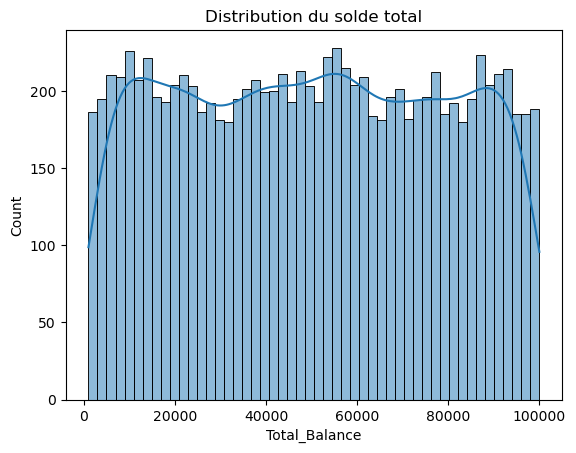

In [19]:
# Distribution du solde
sns.histplot(df_viz['Total_Balance'], bins=50, kde=True)
plt.title("Distribution du solde total")
plt.show()

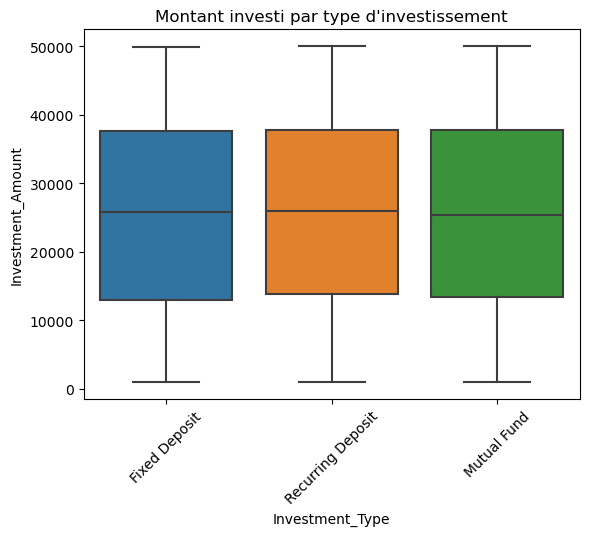

In [20]:
# Corrélation avec le type d'investissement
sns.boxplot(x=df_viz['Investment_Type'], y=df_viz['Investment_Amount'])
plt.title("Montant investi par type d'investissement")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Age'>

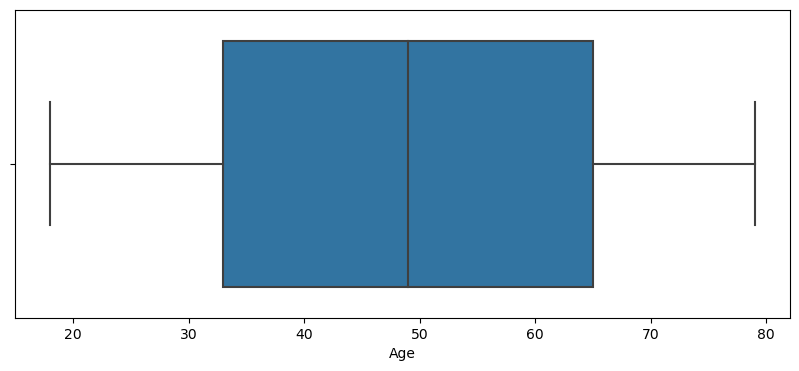

In [21]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_viz, x='Age')

<Axes: xlabel='Investment_Amount'>

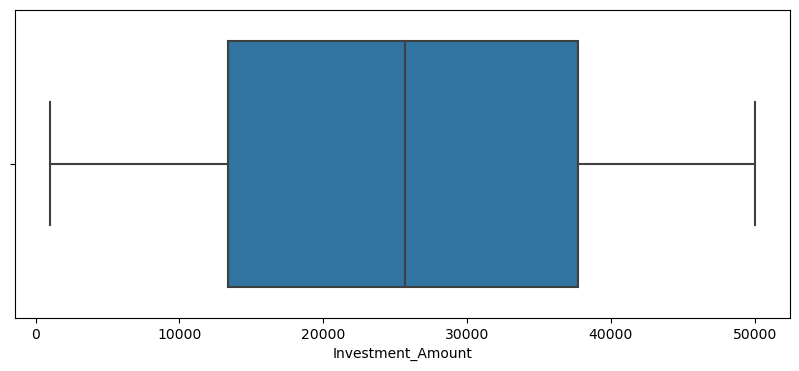

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_viz, x='Investment_Amount')

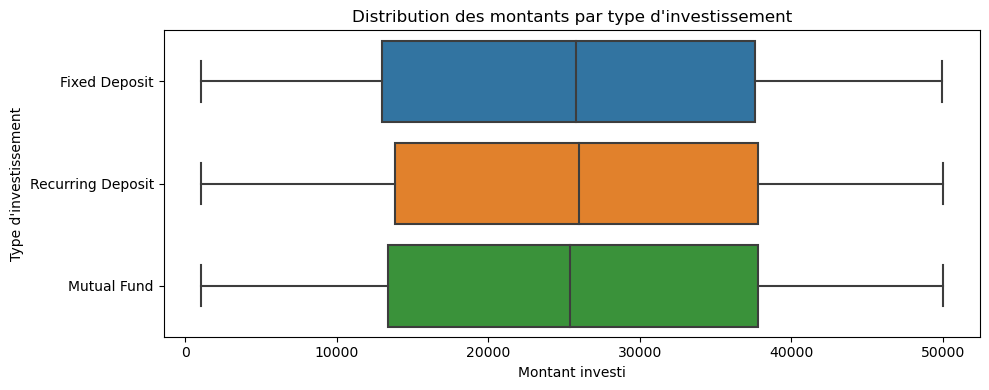

In [23]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_viz, y='Investment_Type', x='Investment_Amount')
plt.title("Distribution des montants par type d'investissement")
plt.xlabel("Montant investi")
plt.ylabel("Type d'investissement")
plt.tight_layout()
plt.show()

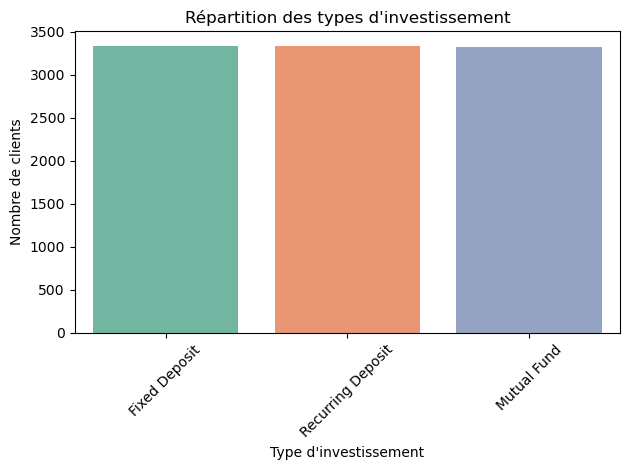

In [24]:
# Visualiser la fréquence avec ountplot
sns.countplot(data=df_viz, x='Investment_Type', palette='Set2')
plt.title("Répartition des types d'investissement")
plt.xlabel("Type d'investissement")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

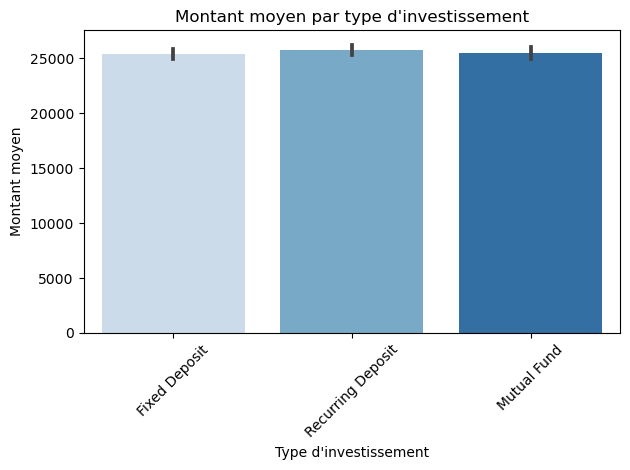

In [25]:
#Visualiser la moyenne des montants avec barplot
sns.barplot(data=df_viz, x='Investment_Type', y='Investment_Amount', estimator='mean', palette='Blues')
plt.title("Montant moyen par type d'investissement")
plt.xlabel("Type d'investissement")
plt.ylabel("Montant moyen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

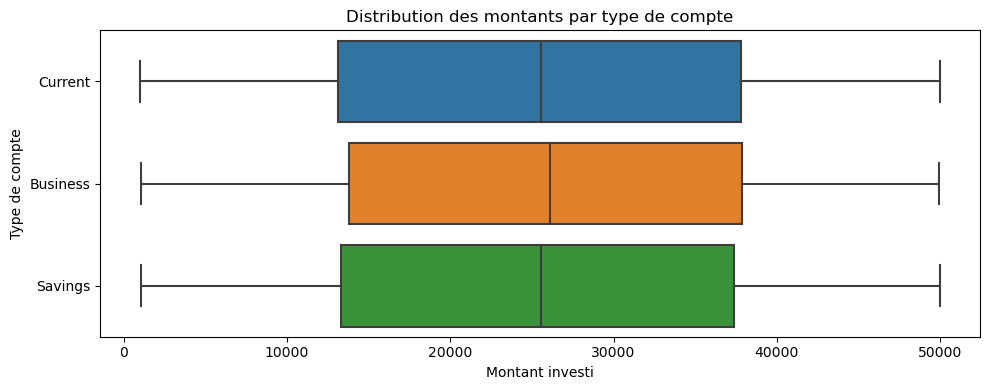

In [26]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_viz, y='Account_Type', x='Investment_Amount')
plt.title("Distribution des montants par type de compte")
plt.xlabel("Montant investi")
plt.ylabel("Type de compte")
plt.tight_layout()
plt.show()

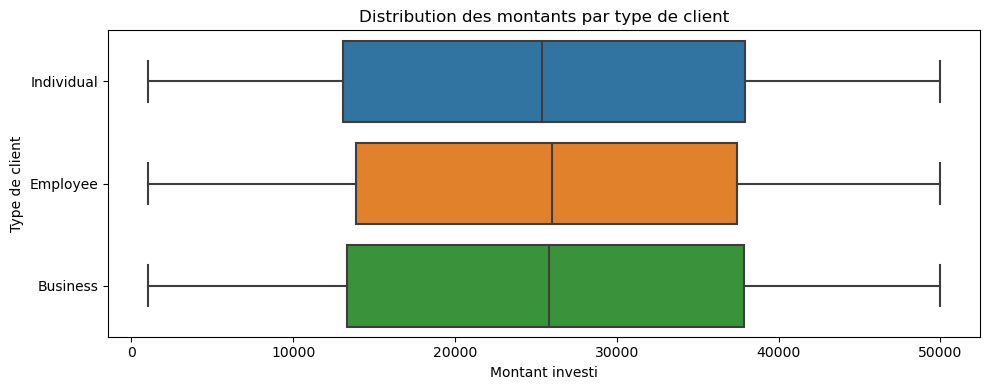

In [27]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_viz, y='Customer_Type', x='Investment_Amount')
plt.title("Distribution des montants par type de client")
plt.xlabel("Montant investi")
plt.ylabel("Type de client")
plt.tight_layout()
plt.show()

In [28]:
df = df_viz.copy()

In [ ]:
df['Investment_Level'] = pd.qcut(df['Investment_Amount'], q=4, labels=['Faible', 'Moyen', 'Élevé', 'Très élevé'])
print(df['Investment_Level']) # création de groupes équilibrés pour visualiser la répartition et tester une corrélation avec Investment_Type

0        Faible
1           NaN
2           NaN
3        Faible
4        Faible
          ...  
14331     Élevé
14332     Moyen
14333    Faible
14334     Élevé
14335     Moyen
Name: Investment_Level, Length: 14336, dtype: category
Categories (4, object): ['Faible' < 'Moyen' < 'Élevé' < 'Très élevé']


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


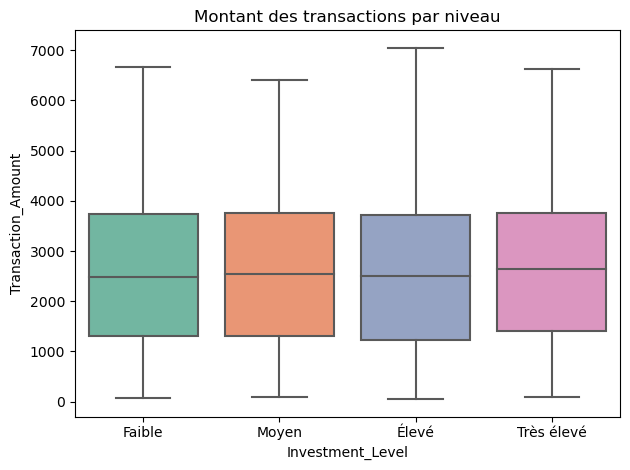

In [30]:
sns.boxplot(data=df, x='Investment_Level', y='Transaction_Amount', palette='Set2')
plt.title("Montant des transactions par niveau")
plt.tight_layout()
plt.show()

#### Affectation de la moyenne sur les valeurs manquantes

In [31]:
# Création d'une copie pour réaliser l'affectation de la moyenne
df_imputed_mean = df.copy()

In [32]:
df_imputed_mean = df_imputed_mean.apply (lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)

In [33]:
df = df_imputed_mean.copy()

In [34]:
# Vérification des doublons
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14331    False
14332    False
14333    False
14334    False
14335    False
Length: 14336, dtype: bool

In [35]:
# Sélection des colonnes numériques uniquement
df_numeric = df.select_dtypes(include=['number'])

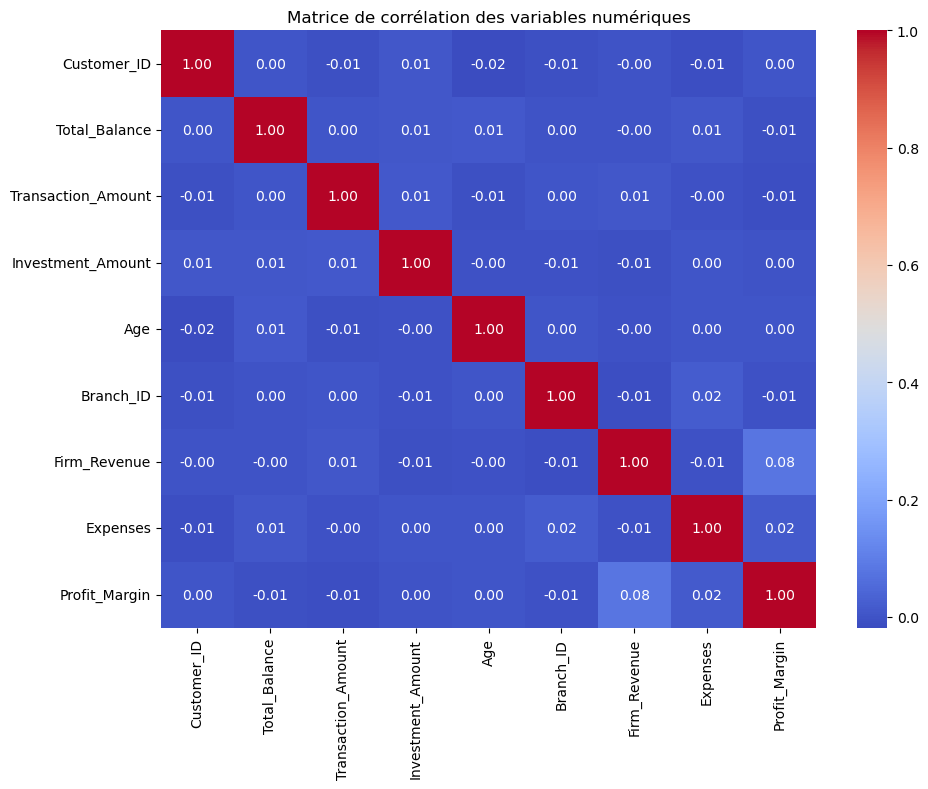

In [36]:
# Calcul de la matrice de corrélation
corr = df_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()

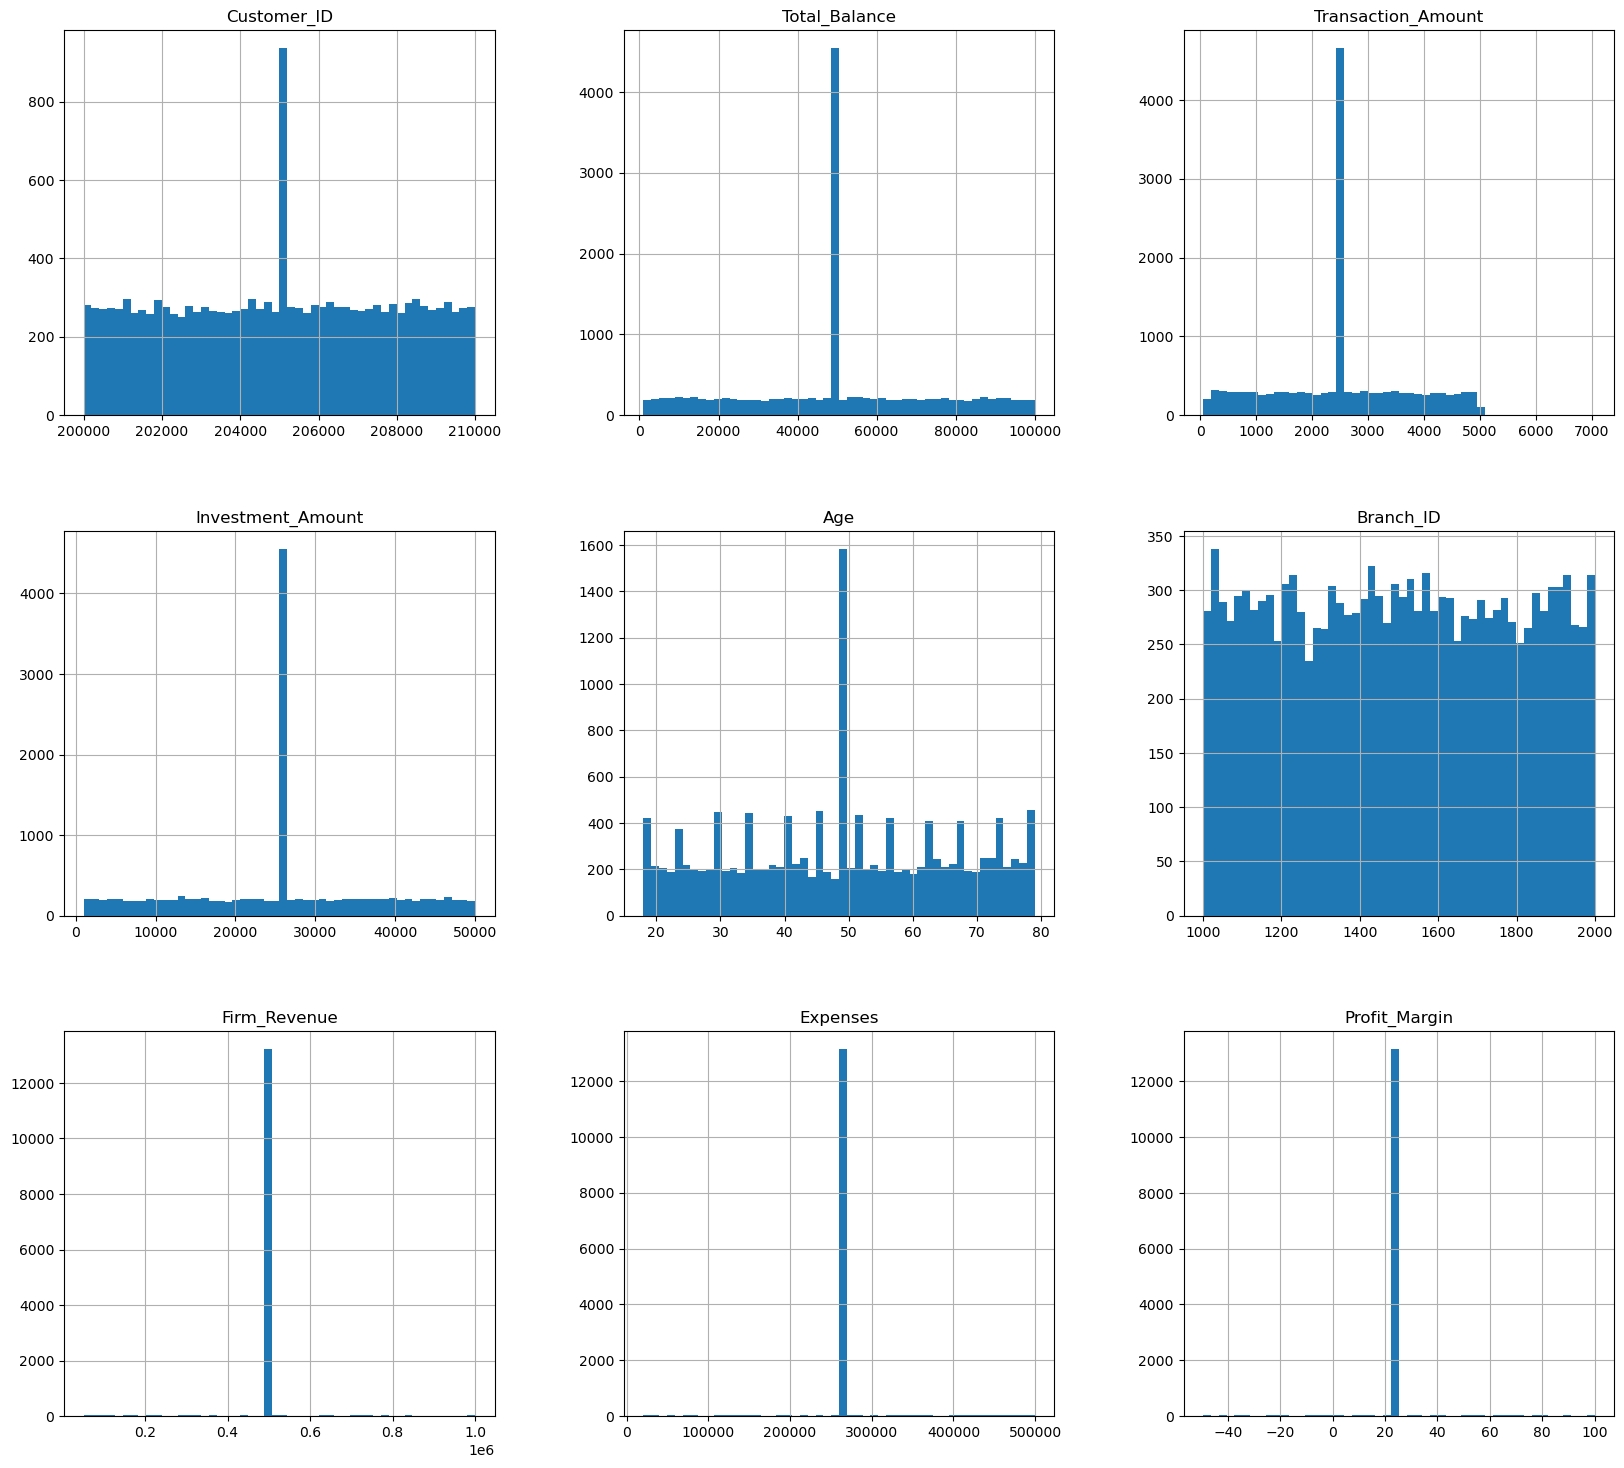

In [37]:
df.hist(bins= 50,figsize=(20,18));

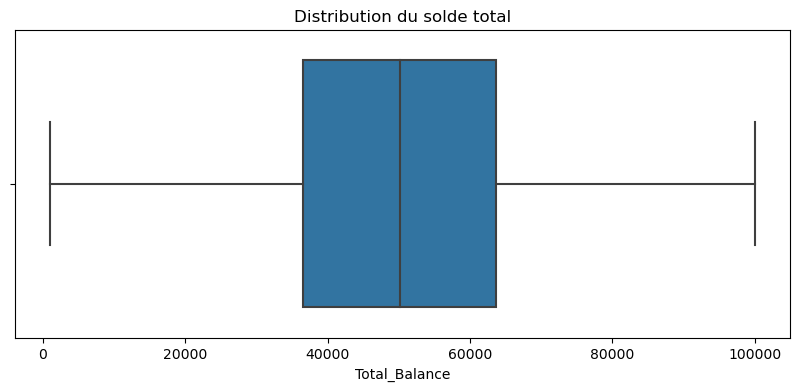

In [38]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Total_Balance'])
plt.title("Distribution du solde total")
plt.show()

#### Copie du dataset pour la suite

In [39]:
fusioned_filename = 'data_cleaned.csv'

In [40]:
# Sauvegarde du dossier 'cleaned_data'
output_directory = r"C:\Users\Admin\Desktop\BankingMLProject\data"

# Nom du fichier CSV de sortie
output_filename = "data_cleaned.csv"

# Création du chemin complet du fichier de sortie
output_filepath = os.path.join(output_directory, output_filename)

#Sauvegarder du DataFrame nettoyé en CSV
try:
    # index=False pour ne pas écrire l'index du DataFrame comme une colonne dans le CSV
    df.to_csv(output_filepath, index=False)
    print(f"\nDataFrame nettoyé sauvegardé avec succès dans : {output_filepath}")
except Exception as e:
    print(f"\nUne erreur est survenue lors de la sauvegarde : {e}")


DataFrame nettoyé sauvegardé avec succès dans : C:\Users\Admin\Desktop\BankingMLProject\data\data_cleaned.csv


In [41]:
# Chargement du fichier
df_verified = pd.read_csv(os.path.join(directory_path,transactions_filename))
df_verified.head()

,Transaction_ID,Customer_ID,Account_Type,Total_Balance,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date
0,300000,209689,Business,69339,4794.0,42580,Fixed Deposit,2024-12-08
1,300001,206124,Business,12825,3500.0,46605,Fixed Deposit,2022-09-09
2,300002,207501,Current,67753,2401.0,17027,Fixed Deposit,2022-04-28
3,300003,208675,Savings,67061,2952.0,3054,Fixed Deposit,2023-05-22
4,300004,204923,Business,8566,1025.0,44937,Fixed Deposit,2023-04-05


Calculs: mise en avant du volume d’investissement par banque, de la segmentation des clients, de laperformance régionale

#Création d'une variable binaire pour prédire si un client choisit un dépôt à terme.

## Séparation des variables

##Variable cible


#On sépare les variables indépendantes (X) de la variable dépendante (y), ici l'Investment_Type du client.
#Cette séparation permet de structurer les données pour l’entraînement du modèle. Le choix de la variable cible dépend du problème métier — ici, comprendre le comportement financier des clients représente un enjeu stratégique.

In [42]:
df.head()

,Customer_ID,Account_Type,Total_Balance,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date,Age,Customer_Type,City,Region,Bank_Name,Branch_ID,Firm_Revenue,Expenses,Profit_Margin,Investment_Level
0,204700.0,Current,57622.0000,4676.000000,11260.0000,Fixed Deposit,2024-04-05,54.0,Individual,Kolhapur,East,HDFC Bank,1000,504952.970563,266171.690671,24.361628,Faible
1,204624.0,NaN,50221.5058,2542.708056,25550.2484,NaN,NaN,75.0,NaN,Kolhapur,West,HDFC Bank,1000,504952.970563,266171.690671,24.361628,NaN
2,201489.0,NaN,50221.5058,2542.708056,25550.2484,NaN,NaN,41.0,Employee,Nashik,South,HDFC Bank,1000,504952.970563,266171.690671,24.361628,NaN
3,205772.0,Current,26773.0000,2924.000000,9480.0000,Recurring Deposit,2025-02-14,57.0,Individual,Nashik,West,HDFC Bank,1000,504952.970563,266171.690671,24.361628,Faible
4,205772.0,Current,31080.0000,780.000000,8956.0000,Fixed Deposit,2022-11-07,57.0,Individual,Nashik,West,HDFC Bank,1000,504952.970563,266171.690671,24.361628,Faible


In [43]:
print(df.dtypes.value_counts())

float64     8
object      7
int64       1
category    1
Name: count, dtype: int64


In [44]:
df_NaN = df.copy()

In [45]:
#Remplissage des valeurs manquantes des variables catégorielles avec ine valeur par défaut -- revoir pour Investment_Type 30% manquant masi c'est la cible de la modélisation
for col in df_NaN.select_dtypes(include=['object']).columns:
    df_NaN[col].fillna('Unknown', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20448\462751294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [46]:
#Remplissage des variables catégorielles manquantes avec les valeurs les plus pertinentes 
for col in df_NaN.select_dtypes(include=['category']).columns:
    most_frequent = df_NaN[col].mode()[0]
    df_NaN[col].fillna(most_frequent, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20448\2729356013.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [47]:
df_NaN.head()

,Customer_ID,Account_Type,Total_Balance,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date,Age,Customer_Type,City,Region,Bank_Name,Branch_ID,Firm_Revenue,Expenses,Profit_Margin,Investment_Level
0,204700.0,Current,57622.0000,4676.000000,11260.0000,Fixed Deposit,2024-04-05,54.0,Individual,Kolhapur,East,HDFC Bank,1000,504952.970563,266171.690671,24.361628,Faible
1,204624.0,Unknown,50221.5058,2542.708056,25550.2484,Unknown,Unknown,75.0,Unknown,Kolhapur,West,HDFC Bank,1000,504952.970563,266171.690671,24.361628,Faible
2,201489.0,Unknown,50221.5058,2542.708056,25550.2484,Unknown,Unknown,41.0,Employee,Nashik,South,HDFC Bank,1000,504952.970563,266171.690671,24.361628,Faible
3,205772.0,Current,26773.0000,2924.000000,9480.0000,Recurring Deposit,2025-02-14,57.0,Individual,Nashik,West,HDFC Bank,1000,504952.970563,266171.690671,24.361628,Faible
4,205772.0,Current,31080.0000,780.000000,8956.0000,Fixed Deposit,2022-11-07,57.0,Individual,Nashik,West,HDFC Bank,1000,504952.970563,266171.690671,24.361628,Faible


##### Repprendre la copie du dataframe ici en cas d'erreur

In [48]:
df = df_NaN.copy()

In [49]:
df['Investment_Fixed'] = (df['Investment_Type'] == 'Fixed Deposit').astype(int)

In [50]:
# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=False)
df_encoded.info()
#Le nettoyage garantit la qualité du modèle. L’encodage permet une exploitation optimale des variables qualitatives sans introduire de redondance dans l'entrainement et les rendre compatibles avec les algorithmes ML

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14336 entries, 0 to 14335
Columns: 1136 entries, Customer_ID to Investment_Level_Très élevé
dtypes: bool(1126), float64(8), int32(1), int64(1)
memory usage: 16.4 MB


In [51]:
print(df_encoded.columns.tolist())

['Customer_ID', 'Total_Balance', 'Transaction_Amount', 'Investment_Amount', 'Age', 'Branch_ID', 'Firm_Revenue', 'Expenses', 'Profit_Margin', 'Investment_Fixed', 'Account_Type_Business', 'Account_Type_Current', 'Account_Type_Savings', 'Account_Type_Unknown', 'Investment_Type_Fixed Deposit', 'Investment_Type_Mutual Fund', 'Investment_Type_Recurring Deposit', 'Investment_Type_Unknown', 'Transaction_Date_2022-03-21', 'Transaction_Date_2022-03-22', 'Transaction_Date_2022-03-23', 'Transaction_Date_2022-03-24', 'Transaction_Date_2022-03-25', 'Transaction_Date_2022-03-26', 'Transaction_Date_2022-03-27', 'Transaction_Date_2022-03-28', 'Transaction_Date_2022-03-29', 'Transaction_Date_2022-03-30', 'Transaction_Date_2022-03-31', 'Transaction_Date_2022-04-01', 'Transaction_Date_2022-04-02', 'Transaction_Date_2022-04-03', 'Transaction_Date_2022-04-04', 'Transaction_Date_2022-04-05', 'Transaction_Date_2022-04-06', 'Transaction_Date_2022-04-07', 'Transaction_Date_2022-04-08', 'Transaction_Date_2022-04

In [52]:
df_encoded.head()

,Customer_ID,Total_Balance,Transaction_Amount,Investment_Amount,Age,Branch_ID,Firm_Revenue,Expenses,Profit_Margin,Investment_Fixed,...,Region_East,Region_North,Region_South,Region_West,Bank_Name_HDFC Bank,Bank_Name_Unknown,Investment_Level_Faible,Investment_Level_Moyen,Investment_Level_Élevé,Investment_Level_Très élevé
0,204700.0,57622.0000,4676.000000,11260.0000,54.0,1000,504952.970563,266171.690671,24.361628,1,...,True,False,False,False,True,False,True,False,False,False
1,204624.0,50221.5058,2542.708056,25550.2484,75.0,1000,504952.970563,266171.690671,24.361628,0,...,False,False,False,True,True,False,True,False,False,False
2,201489.0,50221.5058,2542.708056,25550.2484,41.0,1000,504952.970563,266171.690671,24.361628,0,...,False,False,True,False,True,False,True,False,False,False
3,205772.0,26773.0000,2924.000000,9480.0000,57.0,1000,504952.970563,266171.690671,24.361628,0,...,False,False,False,True,True,False,True,False,False,False
4,205772.0,31080.0000,780.000000,8956.0000,57.0,1000,504952.970563,266171.690671,24.361628,1,...,False,False,False,True,True,False,True,False,False,False


In [53]:
# Suppression des colonnes inutiles
#df.drop(['Transaction_ID','Bank_Name','Branch_ID'], axis=1, inplace=True)

In [54]:
# Encodage one-hot
df_encoded = pd.get_dummies(df, columns=['Account_Type', 'Investment_Type', 'Customer_Type', 'Region', 'City'], drop_first=False)
#éviter la redondance en supprimant une des catégories (utile pour les modèles linéaires)
#Cette méthode permet de transformer chaque catégorie en une série de variables binaires, évitant ainsi les erreurs de type ValueError: could not convert string to float.

In [55]:
# Transposer le DataFrame pour comparer les colonnes comme des lignes
transposed = df_encoded.T

In [56]:
# Identifier les colonnes dupliquées (même contenu)
duplicate_columns = transposed.duplicated(keep='first')

In [57]:
# Afficher les colonnes dupliquées
dups = transposed[duplicate_columns].index.tolist()
print("Colonnes dupliquées :", dups)

Colonnes dupliquées : ['Investment_Type_Fixed Deposit', 'Investment_Type_Unknown']


In [58]:
encoded_cols = [col for col in df_encoded.columns if '_' in col]
print(encoded_cols)

['Customer_ID', 'Total_Balance', 'Transaction_Amount', 'Investment_Amount', 'Transaction_Date', 'Bank_Name', 'Branch_ID', 'Firm_Revenue', 'Profit_Margin', 'Investment_Level', 'Investment_Fixed', 'Account_Type_Business', 'Account_Type_Current', 'Account_Type_Savings', 'Account_Type_Unknown', 'Investment_Type_Fixed Deposit', 'Investment_Type_Mutual Fund', 'Investment_Type_Recurring Deposit', 'Investment_Type_Unknown', 'Customer_Type_Business', 'Customer_Type_Employee', 'Customer_Type_Individual', 'Customer_Type_Unknown', 'Region_East', 'Region_North', 'Region_South', 'Region_West', 'City_Kolhapur', 'City_Mumbai', 'City_Nagpur', 'City_Nashik', 'City_Pune', 'City_Solapur', 'City_Unknown']


In [59]:
# Exemple : vérifier les valeurs uniques dans les colonnes encodées
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'uint8':  # typique des colonnes One-Hot
        uniques = df_encoded[col].unique()
        if set(uniques) - {0, 1}:
            print(f"Incohérence dans la colonne {col} : {uniques}")

In [60]:
#df.drop(['Transaction_ID', 'Bank_Name', 'Branch_ID'], axis=1, inplace=True)

In [61]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Colonnes non numériques :", non_numeric_cols.tolist())
print(df.dtypes.value_counts())

Colonnes non numériques : ['Account_Type', 'Investment_Type', 'Transaction_Date', 'Customer_Type', 'City', 'Region', 'Bank_Name']
float64     8
object      7
int64       1
category    1
int32       1
Name: count, dtype: int64


In [62]:
# Exemple : vérifier les valeurs uniques dans les colonnes encodées
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'uint8':  # typique des colonnes One-Hot
        uniques = df_encoded[col].unique()
        if set(uniques) - {0, 1}:
            print(f"Incohérence dans la colonne {col} : {uniques}")

In [63]:
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=False)

In [64]:
print(df.columns)

Index(['Customer_ID', 'Total_Balance', 'Transaction_Amount',
       'Investment_Amount', 'Age', 'Branch_ID', 'Firm_Revenue', 'Expenses',
       'Profit_Margin', 'Investment_Level',
       ...
       'City_Nashik', 'City_Pune', 'City_Solapur', 'City_Unknown',
       'Region_East', 'Region_North', 'Region_South', 'Region_West',
       'Bank_Name_HDFC Bank', 'Bank_Name_Unknown'],
      dtype='object', length=1133)


In [65]:
# Sélection des colonnes numériques
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.columns.tolist())

['Customer_ID', 'Total_Balance', 'Transaction_Amount', 'Investment_Amount', 'Age', 'Branch_ID', 'Firm_Revenue', 'Expenses', 'Profit_Margin', 'Investment_Fixed']


In [66]:
# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

# Affichage des corrélations avec le type d'Investissement
target_col = 'Investment_Fixed'  # colonne binaire créée pour prédire Fixed Deposit
print(corr_matrix[target_col].sort_values(ascending=False))

Investment_Fixed      1.000000
Age                   0.014100
Total_Balance         0.012054
Profit_Margin         0.007067
Expenses              0.005108
Customer_ID           0.003482
Branch_ID            -0.000894
Transaction_Amount   -0.007075
Investment_Amount    -0.007487
Firm_Revenue         -0.008514
Name: Investment_Fixed, dtype: float64


In [67]:
#prédire le type d'investissement
target = 'Investment_Type_Fixed Deposit' ##anticiper les préférences d’investissement pour personnaliser l’offre. Fixed Deposit

X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

# Variables explicatives
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

# Entraînement du modèle de l'Arbre de décision (Decision Tree)

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création du modèle
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
#ax_depth=3 permet de rendre l’arbre plus lisible tout en réduisant le risque de surapprentissage. La séparation des données assure une évaluation plus réaliste des performances du modèle. Ce modele est idéal pour une première preuve de concept

ValueError: could not convert string to float: '2023-12-08'

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prédictions
y_pred = tree_model.predict(X_test)

# Métriques
print("Précision:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification:\n", classification_report(y_test, y_pred))
#On évalue le modèle avec des métriques classiques : précision, matrice de confusion, F1-score

Précision: 1.0
Matrice de confusion:
 [[3289    0]
 [   0 1012]]
Rapport de classification:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      3289
        True       1.00      1.00      1.00      1012

    accuracy                           1.00      4301
   macro avg       1.00      1.00      1.00      4301
weighted avg       1.00      1.00      1.00      4301



In [ ]:
df_model = df_encoded.copy()

In [ ]:
# Sauvegarde des données en CSV pour visualisation surPower BI
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
y_pred.to_csv('y_pred.csv', index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

## Visualisation

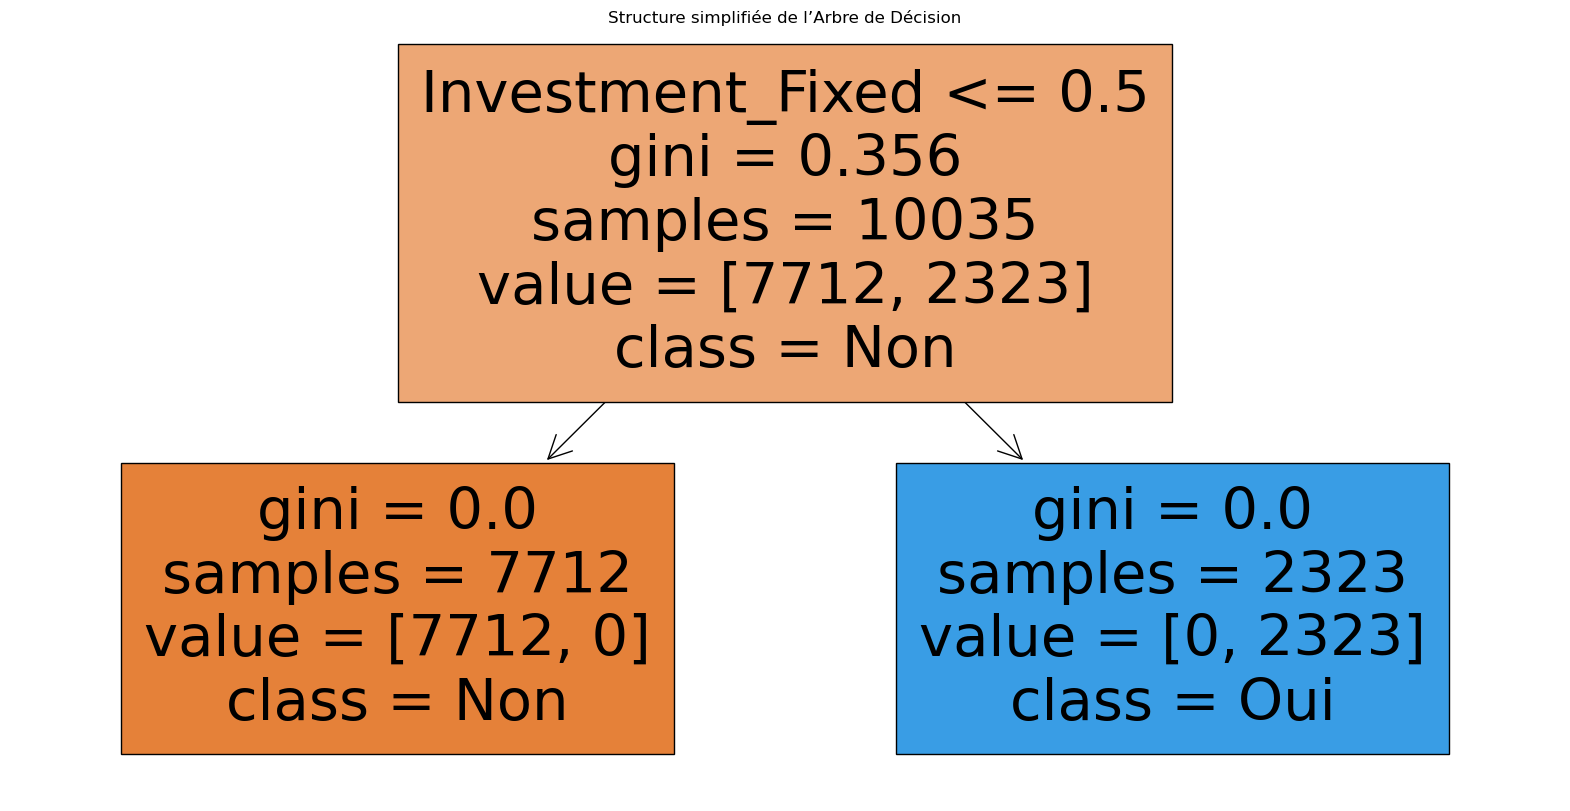

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled = True, feature_names = X.columns, class_names = ["Non", "Oui"], max_depth = 5) # max_depth limite a 5 pour meilleure lisibilite
plt.title("Structure simplifiée de l’Arbre de Décision")
plt.show()

Le noeud (gini) est pur, tous les échantilloins appartiennent à 1 seule classe, il y a un équilibre, c'est une séparation quasi parfaite.

In [ ]:
X = df_encoded.drop('Investment_Fixed', axis=1)
y = df_encoded['Investment_Fixed']

In [ ]:
#Reprise de l'entraînement
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation du modèle
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entraînement
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prédictions
y_pred = tree_model.predict(X_test)

# Métriques
print("Précision:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification:\n", classification_report(y_test, y_pred))
#évaluation du modèle : précision, matrice de confusion, F1-score

Précision: 1.0
Matrice de confusion:
 [[3289    0]
 [   0 1012]]
Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3289
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      4301
   macro avg       1.00      1.00      1.00      4301
weighted avg       1.00      1.00      1.00      4301



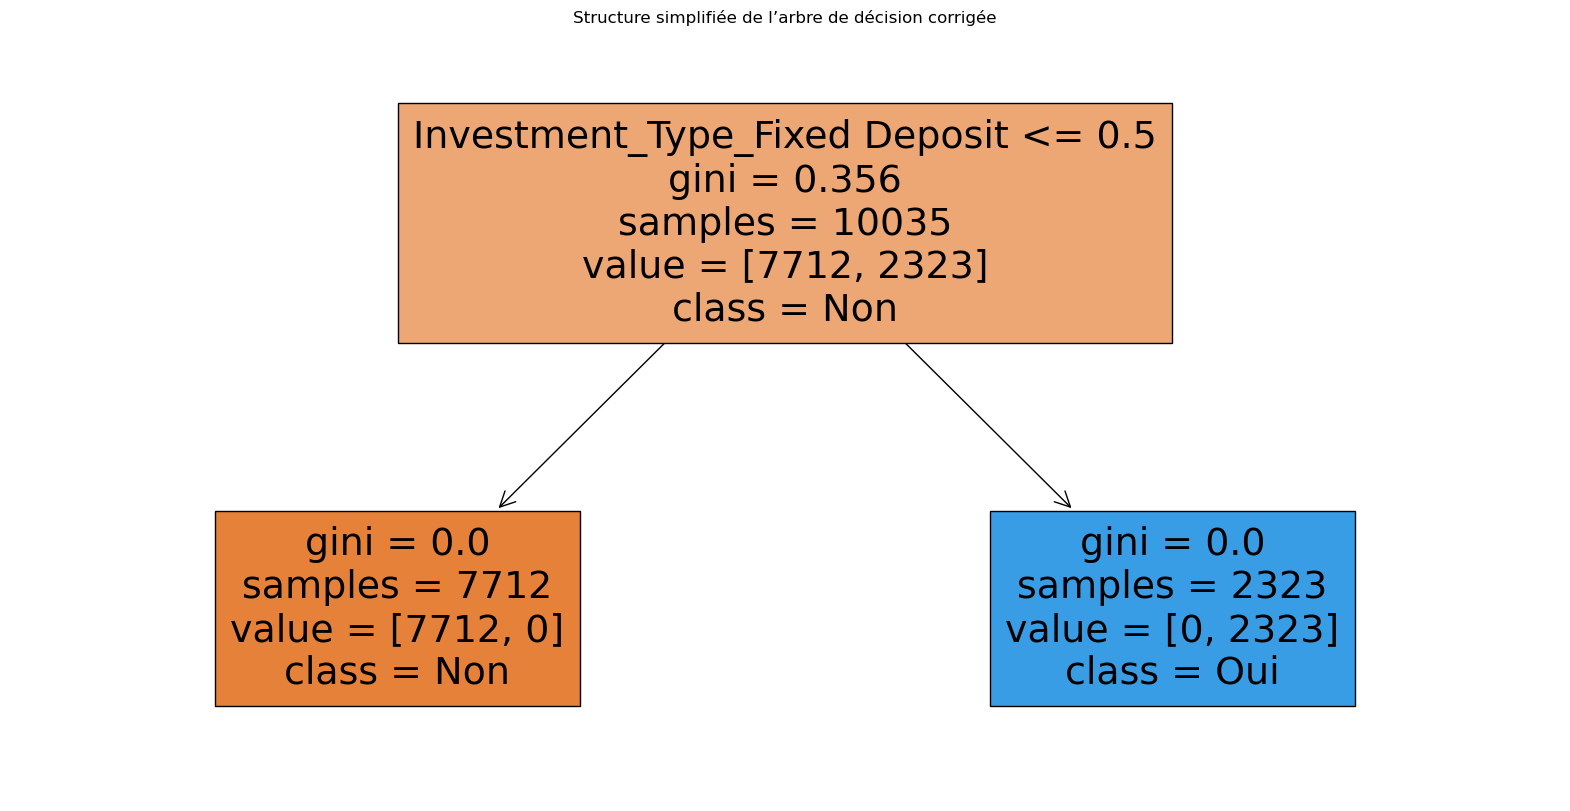

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["Non", "Oui"], max_depth=5)
plt.title("Structure simplifiée de l’arbre de décision corrigée")
plt.show()

In [ ]:
df = df_model.copy()

In [ ]:
import dtreeviz
#Visualisation avec dtreeviz 
viz = dtreeviz.model(model = tree_model, 
               X_train = X_train, 
               y_train = y_train, 
               target_name = 'Investment_Fixed', 
               feature_names = X_train.columns.tolist(), 
               class_names=["No", "Yes"]
               )

viz.view()


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [ ]:
! pip show dtreeviz

Name: dtreeviz
Version: 2.2.2
Summary: A Python 3 library for sci-kit learn, XGBoost, LightGBM, Spark, and TensorFlow decision tree visualization
Home-page: https://github.com/parrt/dtreeviz
Author: Terence Parr, Tudor Lapusan, and Prince Grover
Author-email: parrt@antlr.org
License: MIT
Location: C:\Users\Admin\anaconda3\Lib\site-packages
Requires: colour, graphviz, matplotlib, numpy, pandas, pytest, scikit-learn
Required-by: 


In [ ]:
from dtreeviz.trees import *
viz = dtreeviz.model(
                model = tree_model,
        x_data = X_train,
        y_data = y_train,
        target_name = target,
        feature_names = X_train.columns.tolist(),
        tree_index = 0)

TypeError: model() got an unexpected keyword argument 'x_data'

In [ ]:
graphviz_path = r'C:\Users\Admin\anaconda3\Lib\site-packages'
#Visualisation avec graphviz
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=X.columns,
                           class_names=["No", "Yes"],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_graphviz")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Interprétatin du modèle

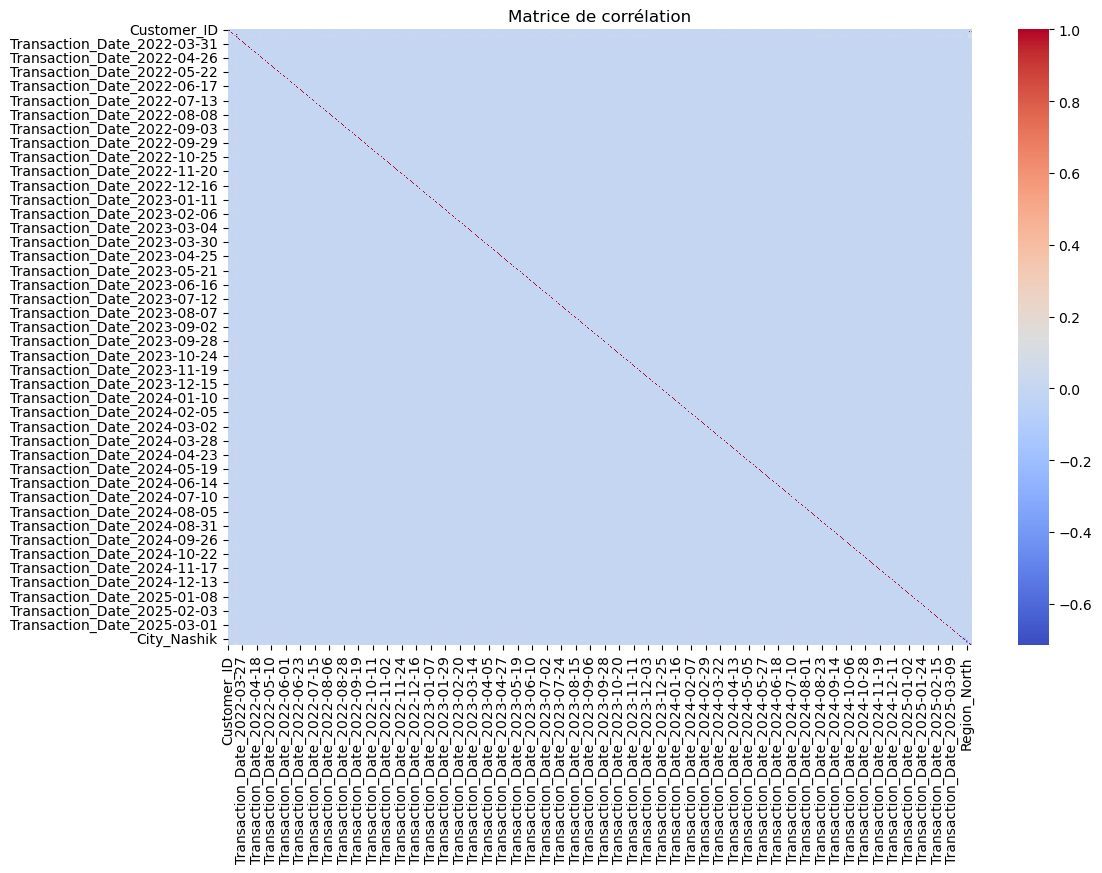

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Matrice de corrélation")
plt.show()

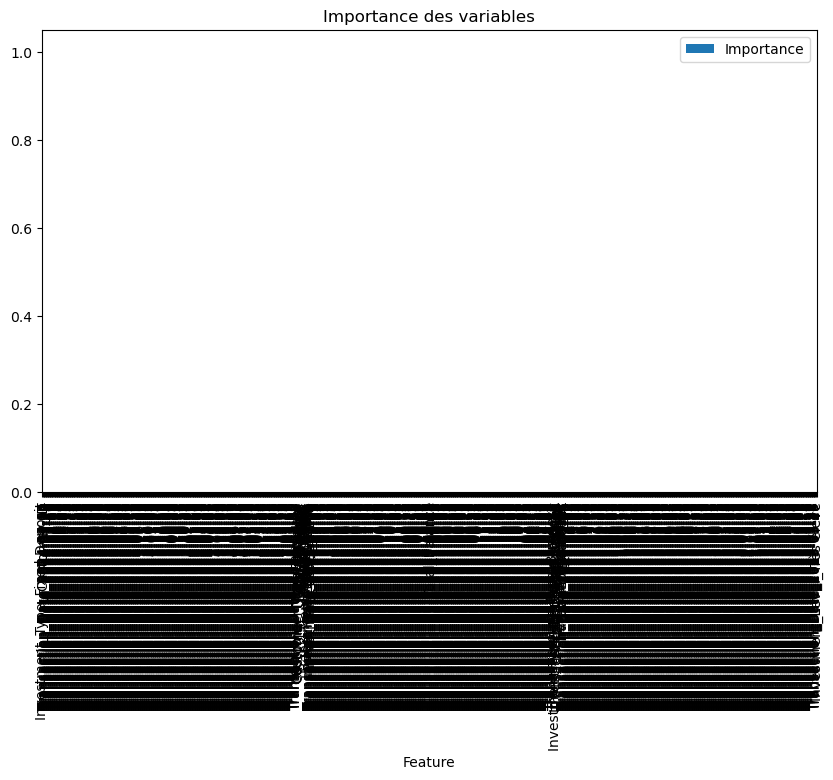

In [ ]:
# Importance des features
importances = tree_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features_df.sort_values(by='Importance', ascending=False).plot.bar(x='Feature', y='Importance', figsize=(10,6))
plt.title("Importance des variables")
plt.show()

In [ ]:
import gc
gc.collect()

44911

In [ ]:
print(hasattr(tree_model, "tree_"))

True


In [ ]:
# Vérifie les types dans X_train
print(X_train.dtypes.value_counts())

bool       1120
float64       8
int64         1
Name: count, dtype: int64


In [ ]:
# Conversion des colonnes booléennes en entiers
bool_cols = df.select_dtypes(include='bool').columns

In [ ]:
df[bool_cols] = df[bool_cols].astype(int)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dot_data = export_graphviz(
    tree_model,
    out_file = None,
    feature_names = X.columns,
    class_names = ["No", "Yes"],
    filled = True,
    rounded = True,
    special_characters = True
)

In [ ]:
graph = graphviz.Source(dot_data)
graph.render("decision_tree_graphviz")
graph.view()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH